## PERFORMING LINEAR REGRESSION USING INTEL'S oneDAL LIBRARY FOR PREDICTIVE ANALYSIS

#### Install daal4py, Python API for Intel's oneDAL

In [ ]:
%pip install daal4py

#### Linear Regression model training and generating predictions

In [1]:
import json
import pandas as pd
import daal4py as d4p
import numpy as np

# Load the JSON data
with open('sample_values.json') as f:
    data = json.load(f)

# Convert JSON data into DataFrame
df = pd.DataFrame(data)

# Use Power (V2) as the target variable (Y) and Voltage (V1) as the feature (X)
X = np.array(df['V1']).reshape(-1, 1)  # Feature (Voltage)
y = np.array(df['V2']).reshape(-1, 1)  # Target (Power)

# Create and train the Linear Regression model using oneDAL
train_algo = d4p.linear_regression_training()
train_result = train_algo.compute(X, y)

# Extract the trained model
model = train_result.model

# Predict Power using the trained model
predict_algo = d4p.linear_regression_prediction()
predictions = predict_algo.compute(X, model)

# Show predictions
print("Predictions:")
print(predictions.prediction)

# Compare actual Power (V2) with predicted Power
df['Predicted Power'] = predictions.prediction.flatten()
print(df[['V2', 'Predicted Power']])


Predictions:
[[1.74086519]
 [5.46908977]
 [3.48173039]
 [4.66798366]
 [7.13292553]
 [3.08117734]
 [4.06715408]
 [6.19316644]
 [2.95793024]
 [2.01817115]
 [3.32767152]
 [2.52656542]
 [7.27157851]
 [6.51669006]
 [5.438278  ]
 [6.91724312]
 [6.48587829]
 [2.69603017]
 [3.80525401]
 [5.62314864]
 [2.03357704]
 [1.98735938]
 [3.37388918]
 [4.8528543 ]
 [2.00276527]
 [7.39482561]
 [2.38791243]
 [3.32767152]
 [5.34584268]
 [7.36401383]
 [4.83744842]
 [2.85008904]
 [4.29824238]
 [5.25340736]
 [2.5419713 ]
 [7.04049021]
 [5.23800147]
 [2.41872421]
 [6.22397822]
 [4.80663664]
 [1.75627108]
 [4.8528543 ]
 [3.9285011 ]
 [3.63578926]
 [2.14141825]
 [7.36401383]
 [6.68615482]
 [2.38791243]
 [2.94252436]
 [3.49713628]
 [2.69603017]
 [4.03634231]
 [3.55875982]
 [6.48587829]
 [7.11751964]
 [5.94667226]
 [4.83744842]
 [2.00276527]
 [1.91032995]
 [5.80801928]
 [3.62038337]
 [5.7772075 ]
 [7.25617263]
 [4.69879544]
 [2.18763591]
 [6.73237248]
 [4.88366608]
 [5.85423694]
 [2.57278308]
 [5.25340736]
 [4.205

#### Predicted Cost using Predicted Power values

In [2]:
# Step 1: Calculate total future consumption and cost
cost_per_unit = 0.10  # Example cost per unit of power

# Calculate the total predicted power consumption
total_future_consumption = predictions.prediction.sum()

# Calculate the total cost based on future consumption
total_future_cost = total_future_consumption * cost_per_unit

# Print the total future consumption and cost
print(f"Total Future Consumption: {total_future_consumption:.2f} units")
print(f"Total Future Cost: ${total_future_cost:.2f}")


Total Future Consumption: 451.38 units
Total Future Cost: $45.14


#### Sample and Predicted Trends

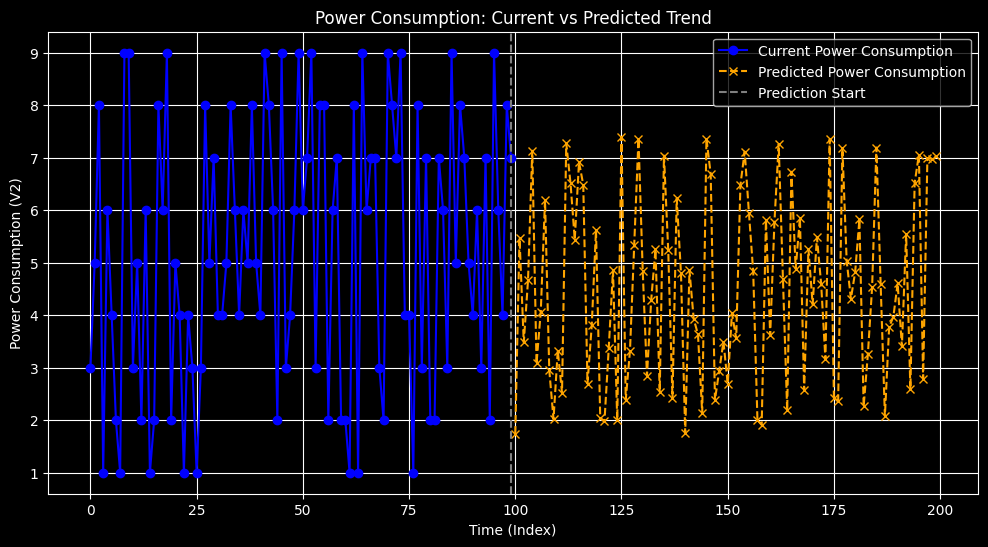

In [3]:
import matplotlib.pyplot as plt

# Step 2: Plot present and predicted power consumption
# Create an array for the x-axis (time or index)
x_values = np.arange(len(df))  # Current power consumption indices

# Extend the x-values for predictions
x_future = np.arange(len(df), len(df) + len(predictions.prediction))

# Combine actual and predicted values for plotting
all_x_values = np.concatenate((x_values, x_future))
all_consumption = np.concatenate((df['V2'], predictions.prediction.flatten()))

# Plot the current and predicted power consumption
plt.figure(figsize=(12, 6))
plt.plot(x_values, df['V2'], label='Current Power Consumption', color='blue', marker='o')
plt.plot(x_future, predictions.prediction.flatten(), label='Predicted Power Consumption', color='orange', linestyle='--', marker='x')
plt.axvline(x=len(df) - 1, color='grey', linestyle='--', label='Prediction Start')

# Customize the plot
plt.title('Power Consumption: Current vs Predicted Trend')
plt.xlabel('Time (Index)')
plt.ylabel('Power Consumption (V2)')
plt.legend()
plt.grid()
plt.show()


#### Performance Metrics

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 3: Evaluate predictions with accuracy metrics
# Since predictions are made on the same dataset, we can compare them directly
actual_values = df['V2'].values  # Actual Power Consumption
predicted_values = predictions.prediction.flatten()  # Predicted Power Consumption

# Calculate metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 2.6965
Mean Squared Error (MSE): 10.2725
R² Score: -0.5824
